Text(0.5, 0, 'Age')

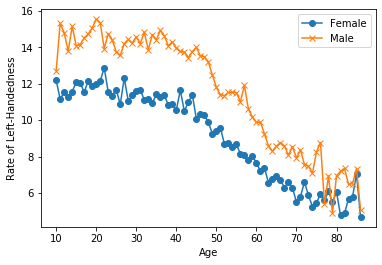

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load the data
data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
lefthanded_data = pd.read_csv(data_url_1)

# plot male and female left-handedness rates vs. age
%matplotlib inline
fig, ax = plt.subplots() # create figure and axis objects
ax.plot( "Age", "Female", data = lefthanded_data, marker = 'o', label = 'Female') # plot "Female" vs. "Age"
ax.plot( "Age", "Male", data = lefthanded_data, marker = 'x', label = 'Male') # plot "Male" vs. "Age"
ax.legend() # add a legend
ax.set_ylabel('Rate of Left-Handedness')
ax.set_xlabel('Age')

Text(0, 0.5, 'Rate of Left-Handedness')

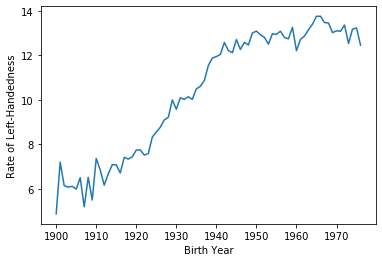

In [2]:
# create a new column for birth year of each age
lefthanded_data['Birth_year'] = 1986- lefthanded_data['Age']

# create a new column for the average of male and female
lefthanded_data['Mean_lh'] = lefthanded_data[['Male','Female']].mean(axis = 1)

# create a plot of the 'Mean_lh' column vs. 'Birth_year'
fig, ax = plt.subplots()
ax.plot('Birth_year', 'Mean_lh', data = lefthanded_data) # plot 'Mean_lh' vs. 'Birth_year'
ax.set_xlabel('Birth Year') # set the x label for the plot
ax.set_ylabel('Rate of Left-Handedness') # set the y label for the plot

In [3]:

# create a function for P(LH | A)
def P_lh_given_A(ages_of_death, study_year = 1990):
    """ P(Left-handed | ages of death), calculated based on the reported rates of left-handedness.
    Inputs: numpy array of ages of death, study_year
    Returns: probability of left-handedness given that subjects died in `study_year` at ages `ages_of_death` """
    
    # Use the mean of the 10 last and 10 first points for left-handedness rates before and after the start 
    early_1900s_rate = lefthanded_data['Mean_lh'].tail(10).mean() 
    late_1900s_rate = lefthanded_data['Mean_lh'].head(10).mean() 
    middle_rates = lefthanded_data.loc[lefthanded_data['Birth_year'].isin(study_year - ages_of_death)]['Mean_lh']
    youngest_age = study_year - 1986 + 10 # the youngest age is 10
    oldest_age = study_year - 1986 + 86 # the oldest age is 86
    
    P_return = np.zeros(ages_of_death.shape) # create an empty array to store the results
    # extract rate of left-handedness for people of ages 'ages_of_death'
    P_return[ages_of_death > oldest_age] = early_1900s_rate/100
    P_return[ages_of_death < youngest_age] = late_1900s_rate/100
    P_return[np.logical_and((ages_of_death <= oldest_age), (ages_of_death >= youngest_age))] = middle_rates / 100
    
    return P_return

Text(0, 0.5, 'Number of People Died')

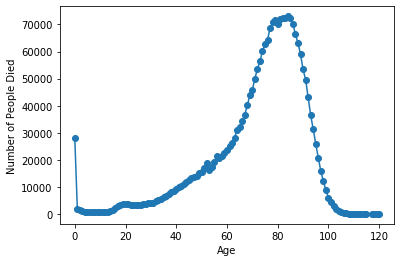

In [4]:
# Death distribution data for the United States in 1999
data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"

# load death distribution data
death_distribution_data = pd.read_csv(data_url_2, sep = '\t', skiprows = [1] )
# drop NaN values from the `Both Sexes` column
death_distribution_data.dropna(subset=['Both Sexes'], inplace = True)

# plot number of people who died as a function of age
fig, ax = plt.subplots()
ax.plot('Age', 'Both Sexes', data = death_distribution_data, marker='o') # plot 'Both Sexes' vs. 'Age'
ax.set_xlabel('Age') 
ax.set_ylabel('Number of People Died')


In [5]:
def P_lh(death_distribution_data, study_year = 1990): # sum over P_lh for each age group
    """ Overall probability of being left-handed if you died in the study year
    Input: dataframe of death distribution data, study year
    Output: P(LH), a single floating point number """
    p_list = death_distribution_data['Both Sexes'] *  P_lh_given_A(death_distribution_data['Age'], study_year) # multiply number of dead people by P_lh_given_A
    p = p_list.sum() # calculate the sum of p_list
    return p/np.sum(death_distribution_data['Both Sexes']) # normalize to total number of people (sum of death_distribution_data['Both Sexes'])

print(P_lh(death_distribution_data))

0.07766387615350638
